<a href="https://colab.research.google.com/github/ongunma/gylim/blob/main/1124F_%EC%9E%84%EA%B1%B4%EC%98%81_201921172.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 간단한 지역별 기상 데이터세트

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#데이터 프레임 형성
df1=pd.DataFrame({'Region':['Seoul','Bucheon','Daejeon','Chuncheon'],
                 'Wind Speed (m/s)':[1,1.5,2,3],
                 'Temperature (°C)':[15,13,10,8],
                 'Humidity (%)':[64,62,63,65],
                 'Pressure (hPa)':[1022,1022,1022,1022],})

df1

,Region,Wind Speed (m/s),Temperature (°C),Humidity (%),Pressure (hPa)
0,Seoul,1.0,15,64,1022
1,Bucheon,1.5,13,62,1022
2,Daejeon,2.0,10,63,1022
3,Chuncheon,3.0,8,65,1022


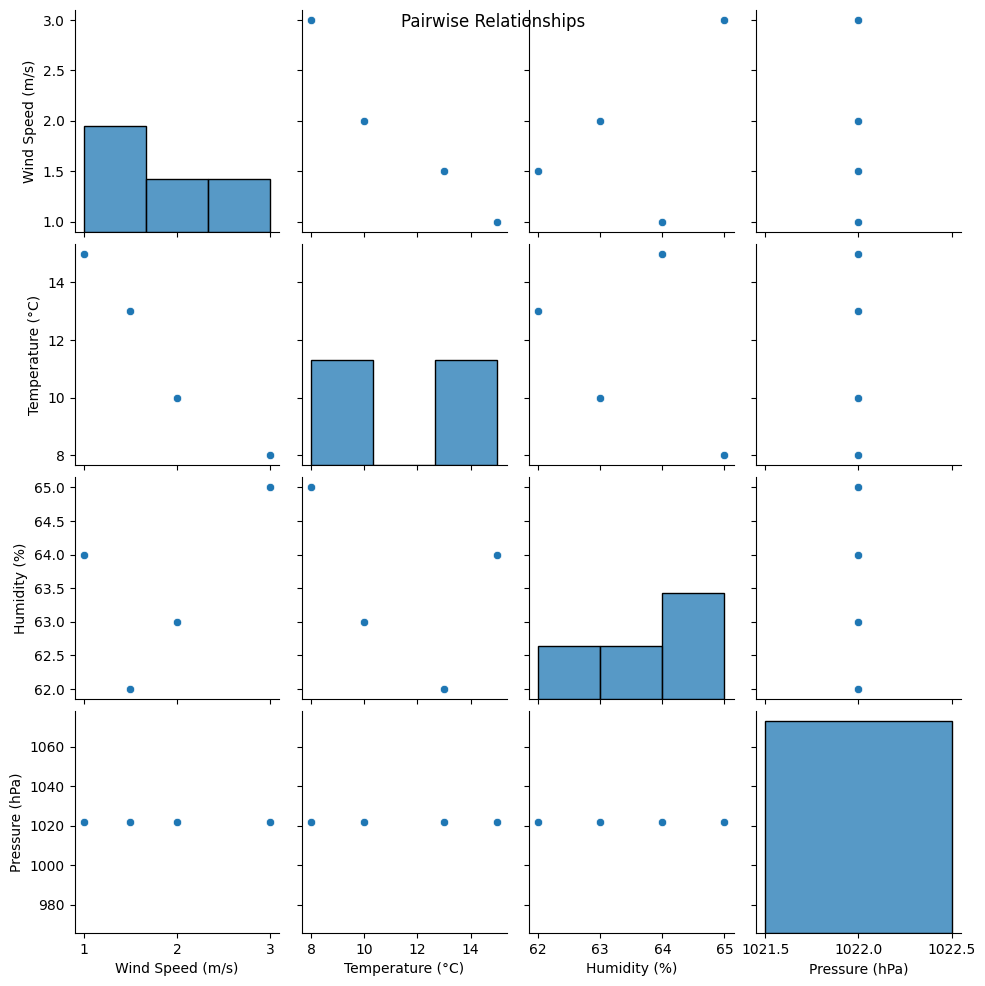

In [4]:
sns.pairplot(df1)
plt.suptitle('Pairwise Relationships')
plt.show()

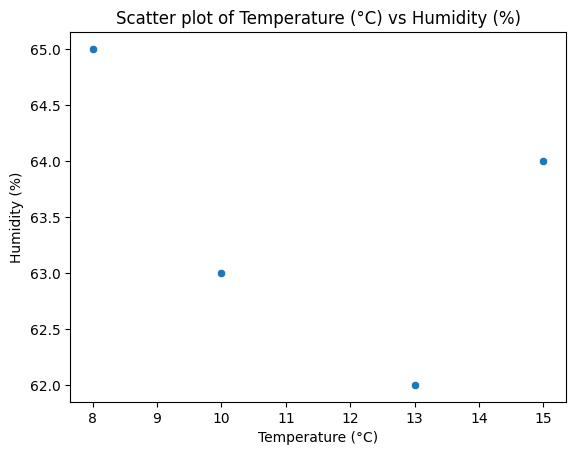

In [5]:
sns.scatterplot(x='Temperature (°C)', y='Humidity (%)', data=df1)
plt.title('Scatter plot of Temperature (°C) vs Humidity (%)')
plt.show()

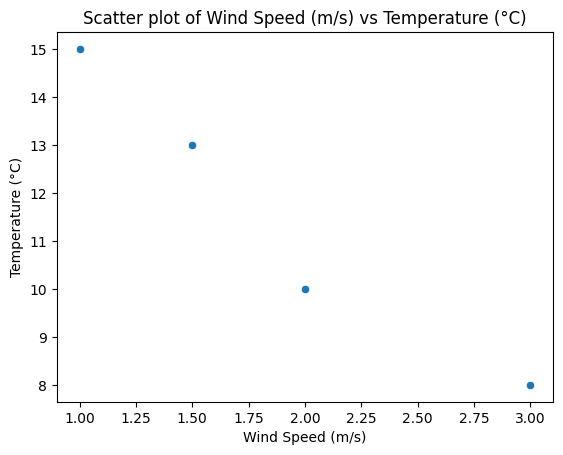

In [6]:
# 연습 - Scatterplot 'Wind Speed (m/s)' vs 'Temperature (°C)' 만들기, 출력하기

sns.scatterplot(x='Wind Speed (m/s)', y='Temperature (°C)', data=df1)
plt.title('Scatter plot of Wind Speed (m/s) vs Temperature (°C)')
plt.show()

In [7]:
# 지역별 Wind Speed 출력

df2 = df1.iloc[:,0:2]
df2

,Region,Wind Speed (m/s)
0,Seoul,1.0
1,Bucheon,1.5
2,Daejeon,2.0
3,Chuncheon,3.0


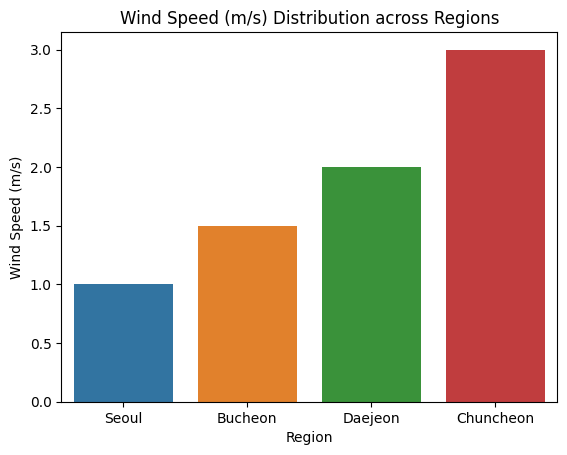

In [8]:
# Barplot을 이용한 지역별 풍속 출력

sns.barplot(x='Region', y='Wind Speed (m/s)', data=df2)
plt.title('Wind Speed (m/s) Distribution across Regions')
plt.show()

In [13]:
# 연습 - 지역별 Humidity 데이터프레임 출력

df3 = df1.iloc[:,[0,3]]
df3

,Region,Humidity (%)
0,Seoul,64
1,Bucheon,62
2,Daejeon,63
3,Chuncheon,65


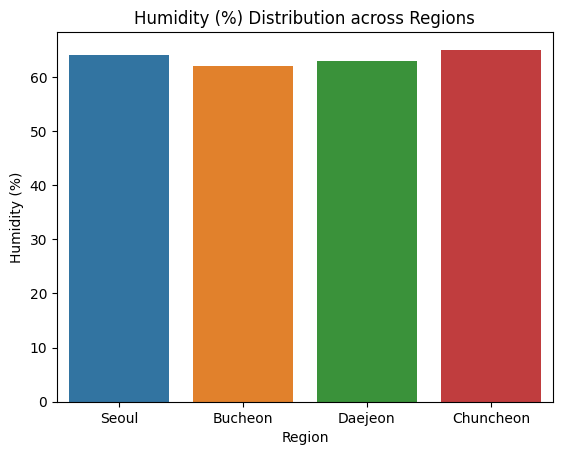

In [14]:
# 연습 = Barplot을 이용한 지역별 Humidity 출력

sns.barplot(x='Region', y='Humidity (%)', data=df3)
plt.title('Humidity (%) Distribution across Regions')
plt.show()

2. Seaborn Dataset - Sea Ice

In [15]:
import pandas as pd
import seaborn as sns

# Load the 'seaice' dataset
seaice = sns.load_dataset('seaice')

#Extent unit: 10^6 km^2
print(seaice)

            Date  Extent
0     1980-01-01  14.200
1     1980-01-03  14.302
2     1980-01-05  14.414
3     1980-01-07  14.518
4     1980-01-09  14.594
...          ...     ...
13170 2019-12-27  12.721
13171 2019-12-28  12.712
13172 2019-12-29  12.780
13173 2019-12-30  12.858
13174 2019-12-31  12.889

[13175 rows x 2 columns]


In [16]:
# 연습 - seaice dataframe 정보 확인
#.info() 함수 활용

seaice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13175 entries, 0 to 13174
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    13175 non-null  datetime64[ns]
 1   Extent  13175 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 206.0 KB


In [17]:
seaice.dtypes

Date      datetime64[ns]
Extent           float64
dtype: object

In [18]:
# 연습 - seaice 결측데이터 확인 .isnull().sum 활용

seaice.isnull().sum()

Date      0
Extent    0
dtype: int64

In [19]:
# seaice 에 월, 년 컬럼 추가하기

seaice['Month']=seaice['Date'].dt.month
seaice['Year']=seaice['Date'].dt.year

seaice.head()

,Date,Extent,Month,Year
0,1980-01-01,14.200,1,1980
1,1980-01-03,14.302,1,1980
2,1980-01-05,14.414,1,1980
3,1980-01-07,14.518,1,1980
4,1980-01-09,14.594,1,1980


In [20]:
#추가 후 컬럼 명 확인
seaice.columns

Index(['Date', 'Extent', 'Month', 'Year'], dtype='object')

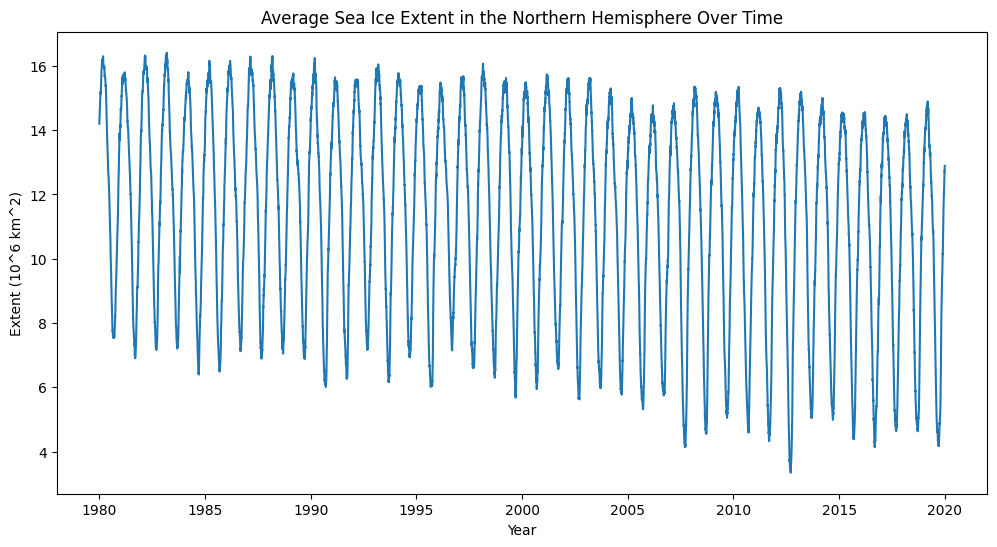

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 시간에 따른 seaice 변화 확인
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extent', data=seaice)
plt.title('Average Sea Ice Extent in the Northern Hemisphere Over Time')
plt.xlabel('Year')
plt.ylabel('Extent (10^6 km^2)')
plt.show()

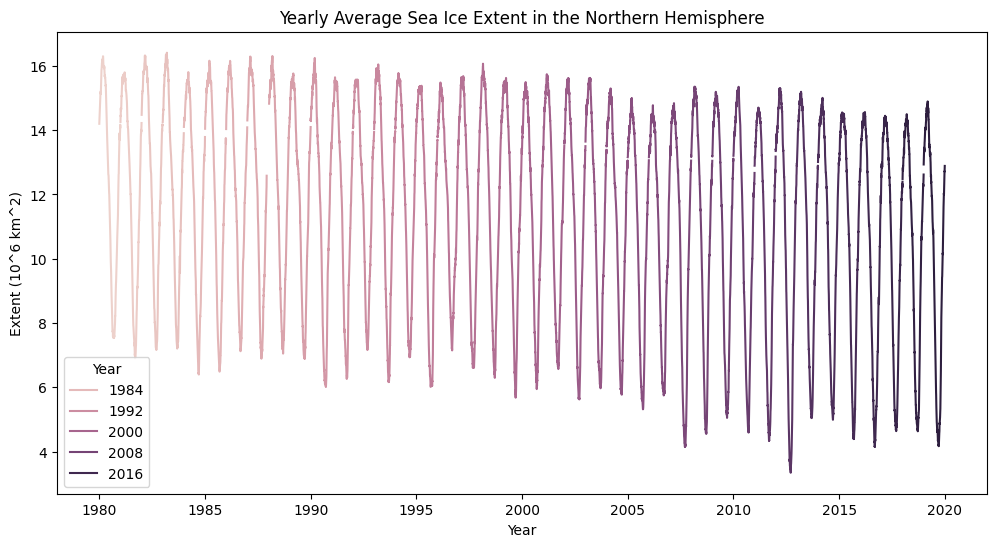

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Line plot to visualize the sea ice extent over time, visualizing with year
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extent', data=seaice, hue='Year')
plt.title('Yearly Average Sea Ice Extent in the Northern Hemisphere')
plt.xlabel('Year')
plt.ylabel('Extent (10^6 km^2)')
plt.show()

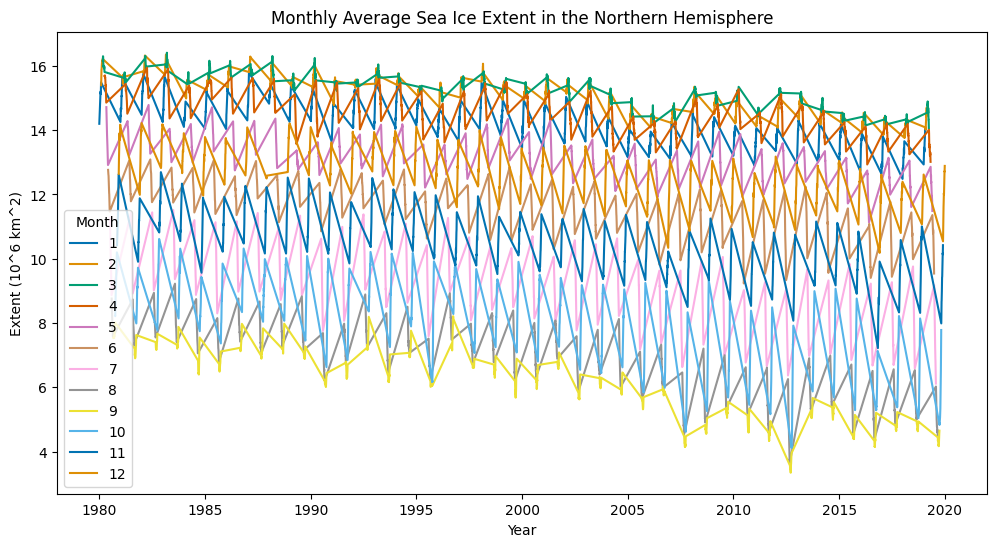

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 시간에 따른 seaice 변화 확인 - 월별로
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extent', data=seaice, hue='Month', palette='colorblind')
plt.title('Monthly Average Sea Ice Extent in the Northern Hemisphere')
plt.xlabel('Year')
plt.ylabel('Extent (10^6 km^2)')
plt.show()

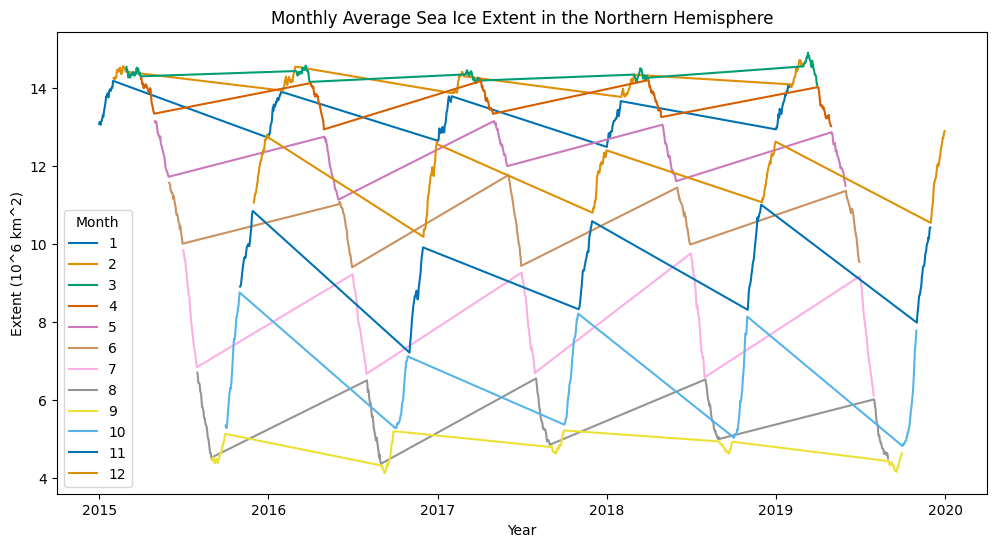

In [24]:
seaice_2015 = seaice[seaice['Date'].dt.year >= 2015]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extent', data=seaice_2015, hue='Month', palette='colorblind')
plt.title('Monthly Average Sea Ice Extent in the Northern Hemisphere')
plt.xlabel('Year')
plt.ylabel('Extent (10^6 km^2)')
plt.show()

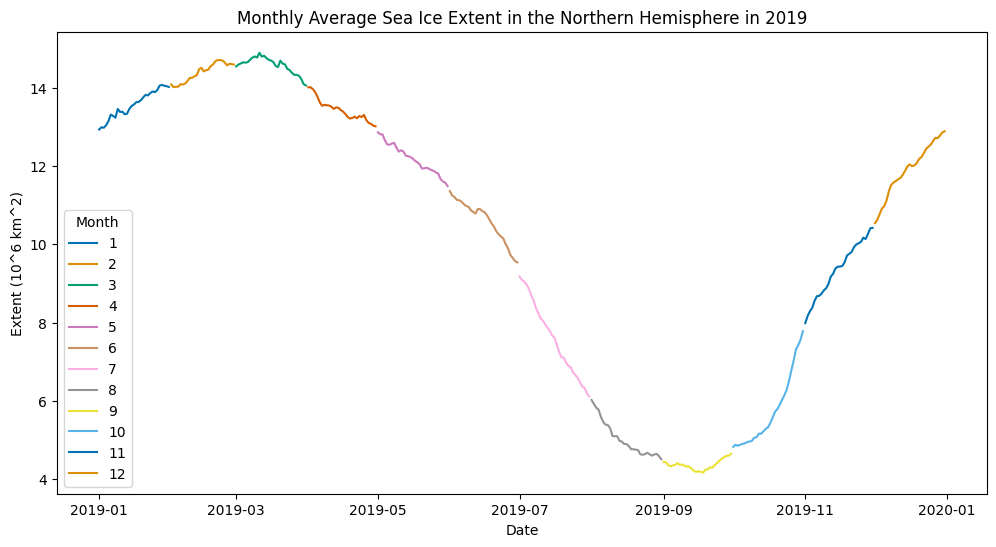

In [25]:
seaice_2019 = seaice[seaice['Date'].dt.year >= 2019]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extent', data=seaice_2019, hue='Month', palette='colorblind')
plt.title('Monthly Average Sea Ice Extent in the Northern Hemisphere in 2019')
plt.xlabel('Date')
plt.ylabel('Extent (10^6 km^2)')
plt.show()

3. Seaborn Dataset - Penguins

In [26]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset('penguins')

print(penguins)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [27]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [28]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [29]:
#연습 - 결측데이터 확인, isna 함수 활용
penguins.isna()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [30]:
# 결측데이터 행 처리
penguins.dropna(inplace=True)

In [31]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

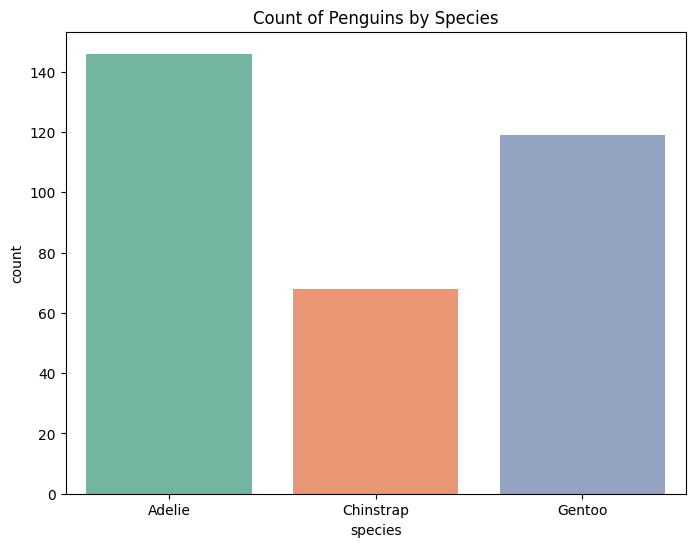

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# Bar Plot for 'species'
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=penguins, palette='Set2')
sns.set(style="whitegrid")
plt.title('Count of Penguins by Species')
plt.show()


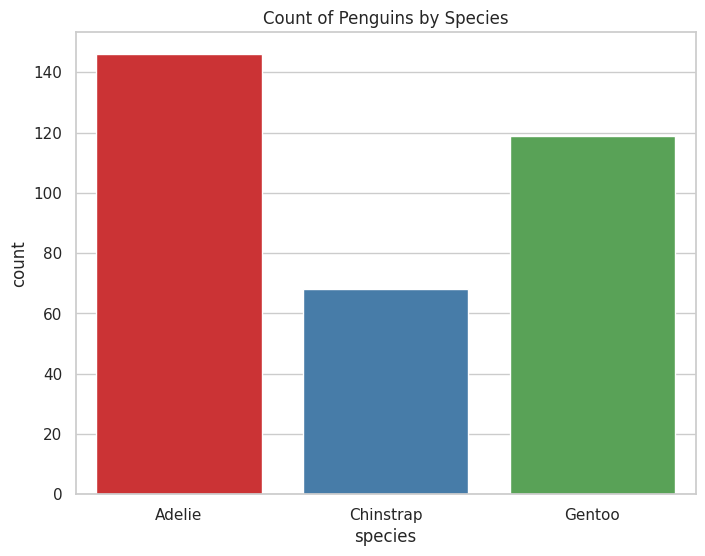

In [34]:
#연습 - palette='Set1' 으로 변경, 변화확인

import seaborn as sns
import matplotlib.pyplot as plt


# Bar Plot for 'species'
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=penguins, palette='Set1')
sns.set(style="whitegrid")
plt.title('Count of Penguins by Species')
plt.show()


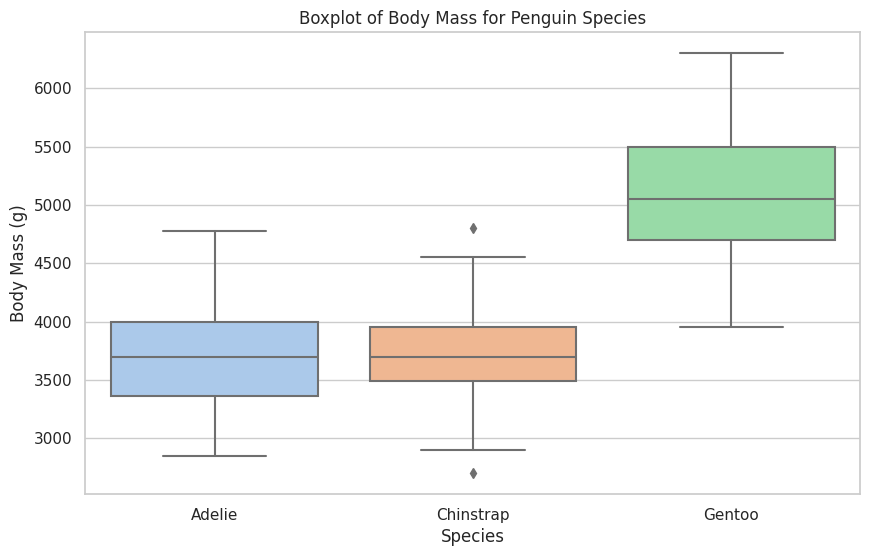

In [35]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='species', y='body_mass_g', data=penguins, palette='pastel')
plt.title('Boxplot of Body Mass for Penguin Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

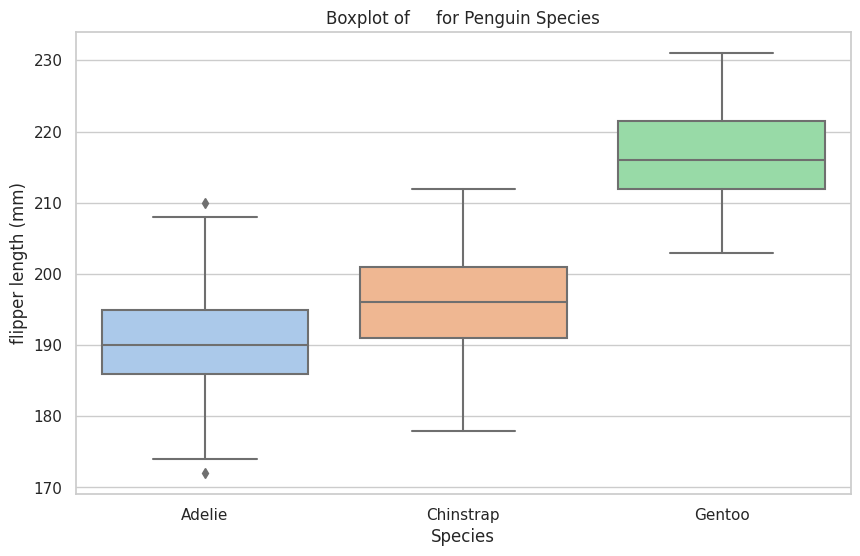

In [36]:
# 연습 - 종별 flipper length (mm) boxplot 출력

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x='species', y='flipper_length_mm', data=penguins, palette='pastel')
plt.title('Boxplot of     for Penguin Species')
plt.xlabel('Species')
plt.ylabel('flipper length (mm)')
plt.show()

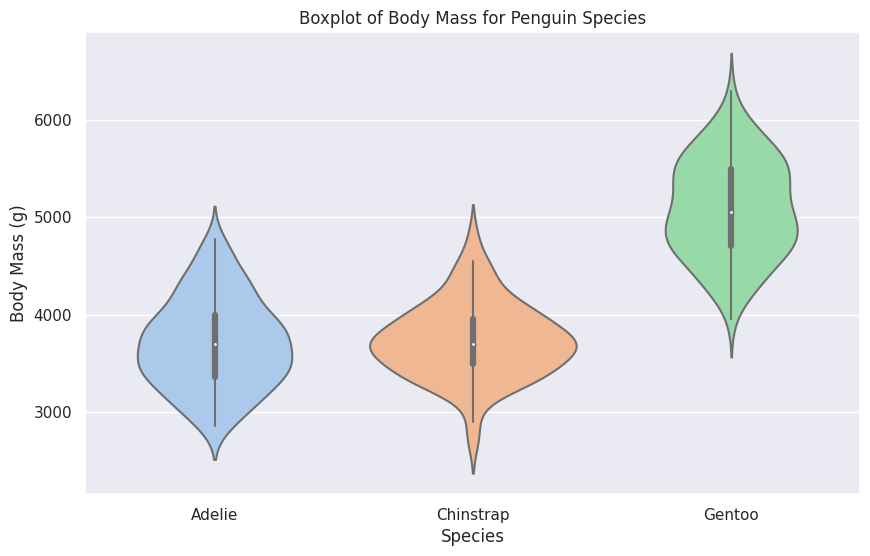

In [37]:
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.violinplot(x='species', y='body_mass_g', data=penguins, palette='pastel')
plt.title('Boxplot of Body Mass for Penguin Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()

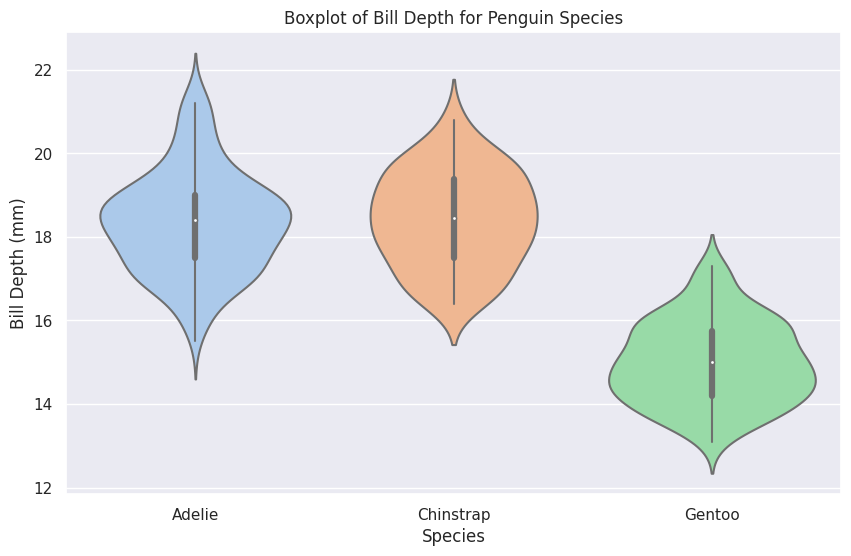

In [38]:
# 연습 - 종별 Bill Depth (mm) Violin plot 확인

plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
sns.violinplot(x='species', y='bill_depth_mm', data=penguins, palette='pastel')
plt.title('Boxplot of Bill Depth for Penguin Species')
plt.xlabel('Species')
plt.ylabel('Bill Depth (mm)')
plt.show()

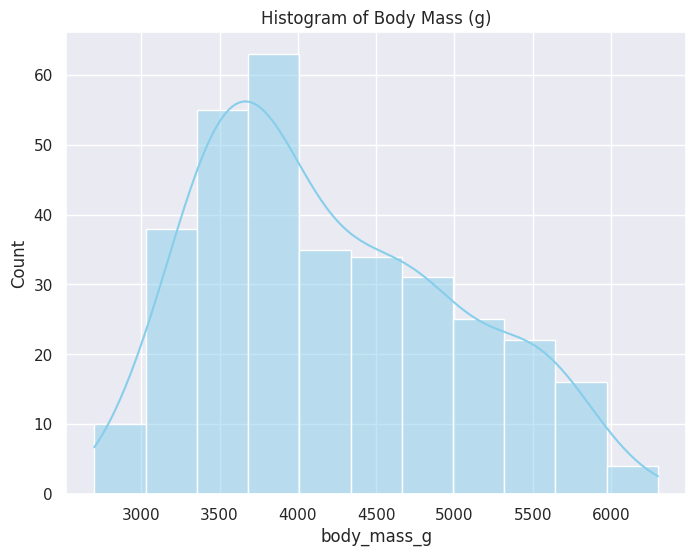

In [39]:
#히스토그램 및 KDE Plot

plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
sns.histplot(x='body_mass_g', data=penguins, kde=True, color='skyblue')
plt.title('Histogram of Body Mass (g)')
plt.show()

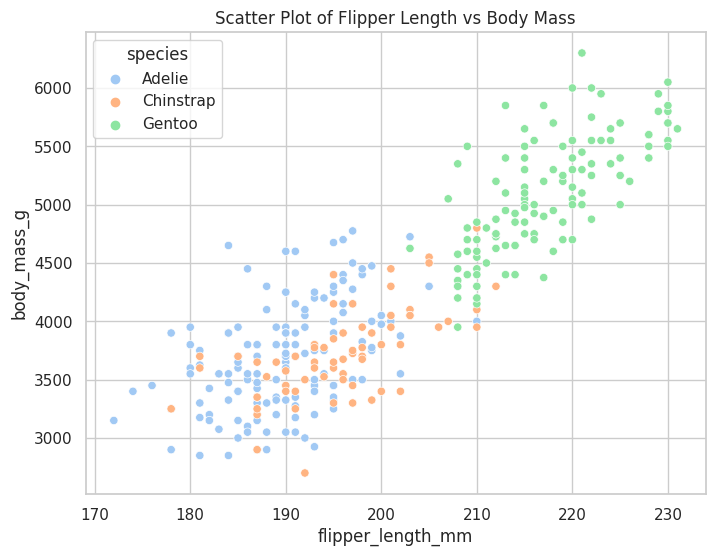

In [40]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=penguins, hue='species', palette='pastel')
plt.title('Scatter Plot of Flipper Length vs Body Mass')
plt.show()

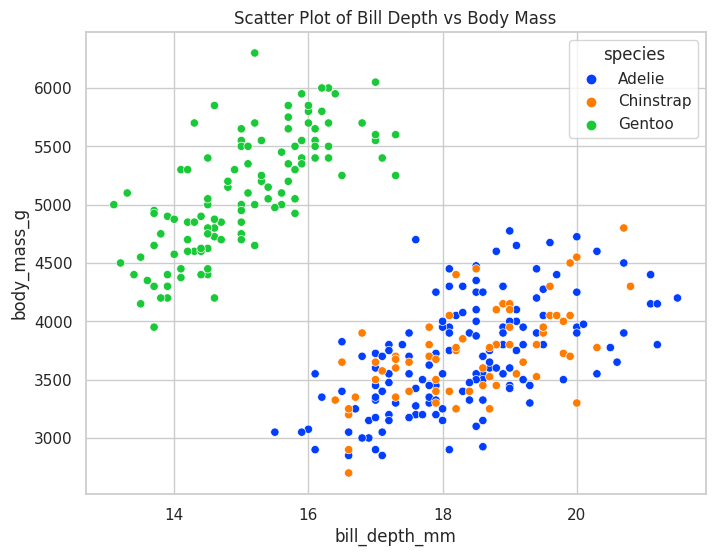

In [41]:
# 연습 - Bill Depth (mm) 별로 Body Mass 분포 나타내기
# palette='bright'

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.scatterplot(x='bill_depth_mm', y='body_mass_g', data=penguins, hue='species', palette='bright')
plt.title('Scatter Plot of Bill Depth vs Body Mass')
plt.show()


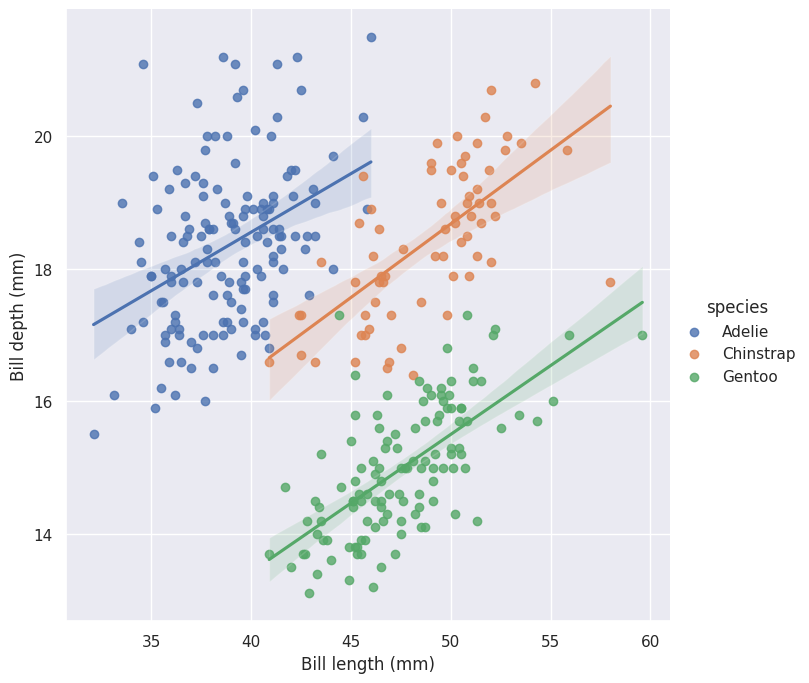

In [42]:
# https://seaborn.pydata.org/examples/multiple_regression.html

import seaborn as sns
sns.set_theme()

# Plot bill length as a function of bill depth
g = sns.lmplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    height=7
)

g.set_axis_labels("Bill length (mm)", "Bill depth (mm)")

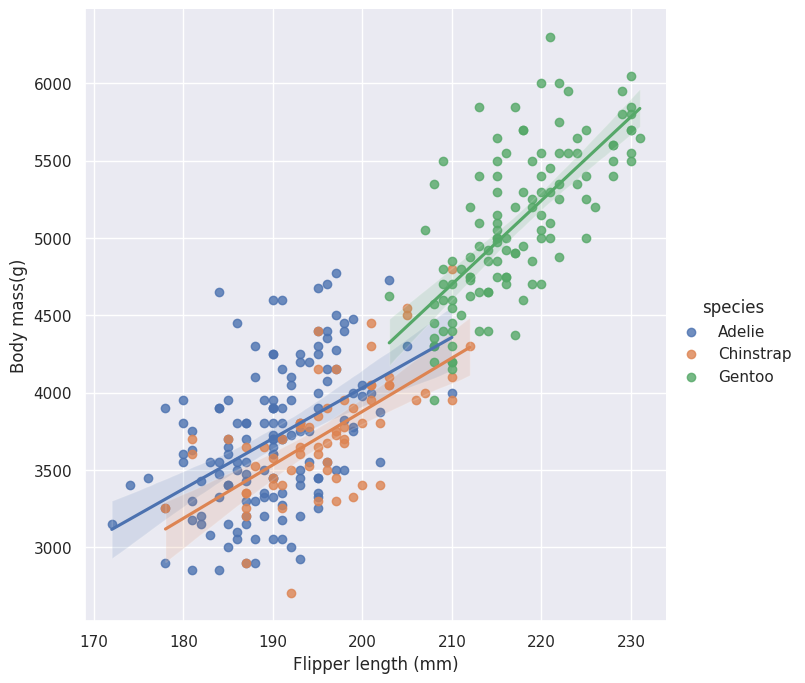

In [43]:
# https://seaborn.pydata.org/examples/multiple_regression.html
# Implot 를 Flipper length (mm), Body mass(g)에 적용

import seaborn as sns
sns.set_theme()

g = sns.lmplot(
    data=penguins,
    x="flipper_length_mm", y="body_mass_g", hue="species",
    height=7
)

g.set_axis_labels("Flipper length (mm)", "Body mass(g)")

[Text(5.875000000000002, 0.5, 'Sex')]

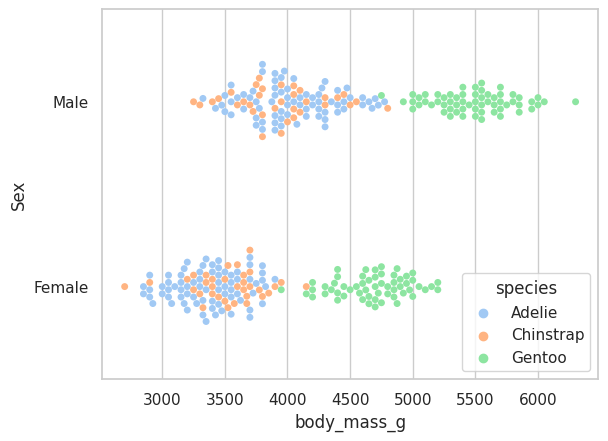

In [46]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species")
ax.set(ylabel="Sex")

[Text(5.875000000000002, 0.5, 'Sex')]

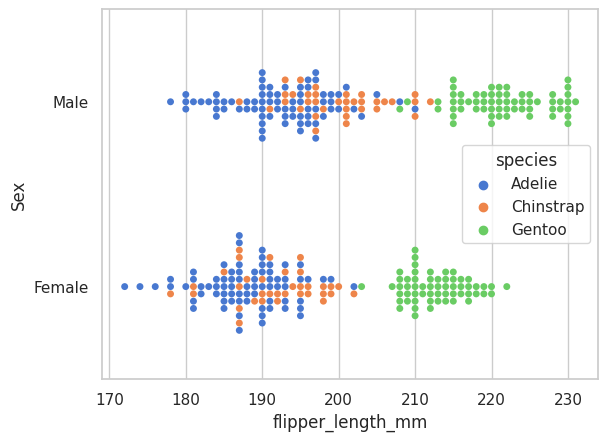

In [47]:
#연습 swarmplot을 flipper length (mm) 에 적용
# palette 색상 변경 = bright, colorblind, muted, pastel 중에 선택

import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="flipper_length_mm", y="sex", hue="species")
ax.set(ylabel="Sex")

[Text(5.875000000000002, 0.5, 'Sex')]

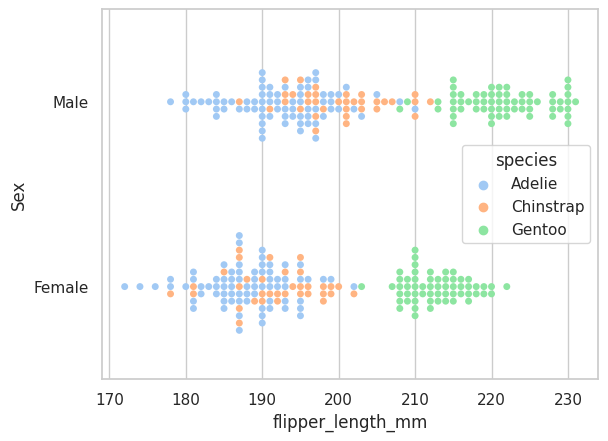

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="flipper_length_mm", y="sex", hue="species")
ax.set(ylabel="Sex")

[Text(5.875000000000002, 0.5, 'Sex')]

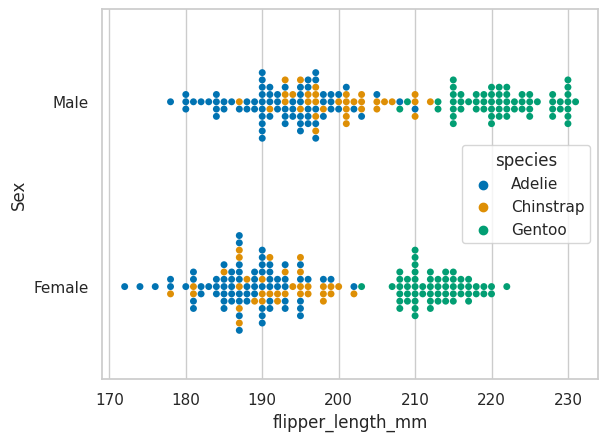

In [49]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="colorblind")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="flipper_length_mm", y="sex", hue="species")
ax.set(ylabel="Sex")

[Text(5.875000000000002, 0.5, 'Sex')]

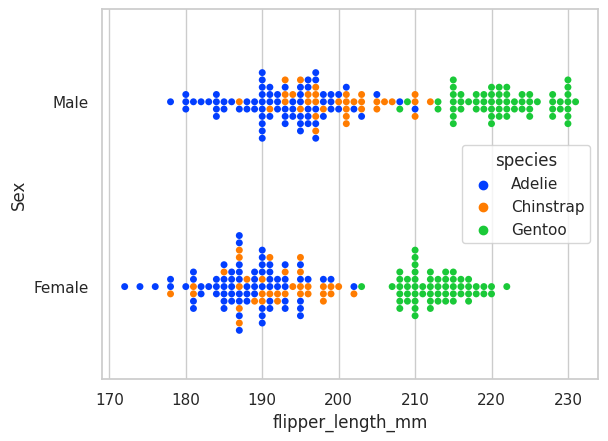

In [50]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="bright")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="flipper_length_mm", y="sex", hue="species")
ax.set(ylabel="Sex")

[Text(5.875000000000002, 0.5, 'Sex')]

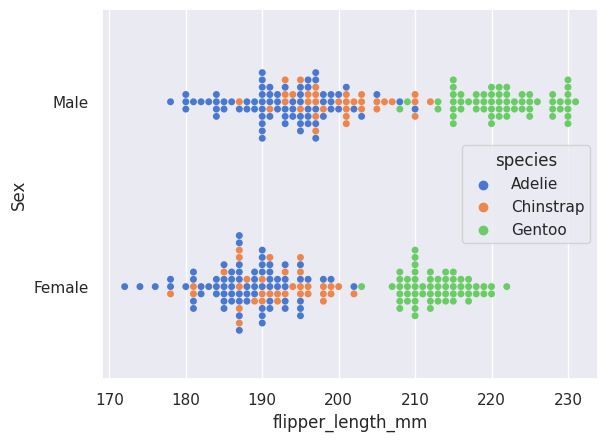

In [52]:
import seaborn as sns
sns.set_theme(style="darkgrid", palette="muted")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=penguins, x="flipper_length_mm", y="sex", hue="species")
ax.set(ylabel="Sex")